# Stroke Prediction Dataset



## Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.


## Attribute Information
1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient



## Objectives of the Lab

### 1. Explore which factors increase the probability of having a heart stroke
### 2. Run regression models with qualitative variables
### 3. Interpret the results


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

import plotly.graph_objects as go

import statsmodels.formula.api as smf

## 1. Let's load the empirical dataset we want to derive insights from

In [47]:
HeartStrokeDataFrame=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/AnalyticsUtilizationManagement/main/data/healthcare-dataset-stroke-data-processed.csv')

In [48]:
HeartStrokeDataFrame

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,0,1,Yes,_Private,Urban,228.69,36.6,formerly smoked,1
1,2,31112,Male,80.0,0,1,Yes,_Private,Rural,105.92,32.5,never smoked,1
2,3,60182,Female,49.0,0,0,Yes,_Private,Urban,171.23,34.4,smokes,1
3,4,1665,Female,79.0,1,0,Yes,_Self-employed,Rural,174.12,24.0,never smoked,1
4,5,56669,Male,81.0,0,0,Yes,_Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4881,5104,14180,Female,13.0,0,0,No,Children,Rural,103.08,18.6,Unknown,0
4882,5106,44873,Female,81.0,0,0,Yes,_Self-employed,Urban,125.20,40.0,never smoked,0
4883,5107,19723,Female,35.0,0,0,Yes,_Self-employed,Rural,82.99,30.6,never smoked,0
4884,5108,37544,Male,51.0,0,0,Yes,_Private,Rural,166.29,25.6,formerly smoked,0


In [49]:
HeartStrokeDataFrame.groupby('hypertension').count()

,Unnamed: 0,id,gender,age,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
hypertension,,,,,,,,,,,,
0,4435,4435,4435,4435,4435,4435,4435,4435,4435,4435,4435,4435
1,451,451,451,451,451,451,451,451,451,451,451,451


In [50]:
HeartStrokeDataFrame.groupby('work_type').count()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
work_type,,,,,,,,,,,,
Children,671,671,671,671,671,671,671,671,671,671,671,671
_Govt_job,630,630,630,630,630,630,630,630,630,630,630,630
_Private,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810
_Self-employed,775,775,775,775,775,775,775,775,775,775,775,775


In [51]:
HeartStrokeDataFrame.groupby('Residence_type').count()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
Residence_type,,,,,,,,,,,,
Rural,2411,2411,2411,2411,2411,2411,2411,2411,2411,2411,2411,2411
Urban,2475,2475,2475,2475,2475,2475,2475,2475,2475,2475,2475,2475


# What drives heart strokes ?

### The outcome variable of interest is `stroke`, it can take two values 0 and 1.
### We want to fit a regression model predicting stroke as a function of other factors such as glucose levels, bmi, age, etc.

## 1. Let's regress stroke on several quantitative factors first

In [52]:
reg1 = smf.ols(formula='stroke~ avg_glucose_level+bmi+age', data=HeartStrokeDataFrame)

In [53]:
results1=reg1.fit()

In [54]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     110.3
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           3.98e-69
Time:                        08:14:15   Log-Likelihood:                 1034.0
No. Observations:                4886   AIC:                            -2060.
Df Residuals:                    4882   BIC:                            -2034.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0526      0.01

## Add interpretation of the results above

#### Given the low R-quared (0.063) the model is not good at predicting the probability of having a stroke given `avg_glucose_level`, `bmi` and `age`. This not necesarilly bad news, models can be bad at predicting yet still useful to establish meaningful relationships.

#### In this case we are finding that the three factors under consideration DO affect the probability of having a heart attack.


#### A one point level increase in `avg_glucose_level` increases the probability of stroke by 0.0004 points. This effect is statistically significant given its p-value close to zero.

#### A one point level increase in `bmi` decreases the probability of stroke by 0.0013 points. This effect is statistically significant given its p-value close to zero. This negative relationship is unexpected, it is assumed that larger bmis are bad for your heart. We would need to conduct further investigations to determine this counterintuitive result.


#### A one point level increase in `age` increases the probability of stroke by 0.0020 points. This effect is statistically significant given its p-value close to zero.




## 2. Let's add some qualitative factors 

### We can improve the previous model by adding other factors such as gender, hypertension and previous medical conditions.

In [55]:
reg2 = smf.ols(formula='stroke~ avg_glucose_level+bmi+age+gender+hypertension+heart_disease+Residence_type', data=HeartStrokeDataFrame)

In [56]:
results2=reg2.fit()

In [57]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     55.41
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.20e-76
Time:                        08:14:15   Log-Likelihood:                 1060.6
No. Observations:                4886   AIC:                            -2105.
Df Residuals:                    4878   BIC:                            -2053.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

## Interpretation
#### The R-squared is still low (0.074).

#### Quantitative factors `avg_glucose_level`,`age` and `bmi` are still statistically significant.

#### The qualitative factor `gender` is not statistically significant (p-value=0.988) therefore we conclude that as far as the probability of having a heart stroke is concerned being a male, or a female, is irrelevant.

#### The qualitative factor `Residence_type` is not statistically significant (p-value=0.734). Therefore the type of residence does not affect the odds of having a heart attack.

#### The qualitative factor `hypertension` is statistically significant (p-value=0.000), therefore we conclude that this factor DOES affect the probability of having a heart attack. Having hypertension increases this probability by 0.0533 points.

#### The qualitative factor `heart_disease` is statistically significant (p-value=0.000), therefore we conclude that this factor DOES affect the probability of having a heart attack. Having a previous heart condition increases this probability by 0.0649 points.

### 3. Let's add an ordinal qualitative factor

#### There is a special kind of qualitative factor, `work_type`. This factor can take four different values according to the four categories of work type we consider in our dataset, refer to the table below.

In [58]:
HeartStrokeDataFrame.groupby('work_type').count()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
work_type,,,,,,,,,,,,
Children,671,671,671,671,671,671,671,671,671,671,671,671
_Govt_job,630,630,630,630,630,630,630,630,630,630,630,630
_Private,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810
_Self-employed,775,775,775,775,775,775,775,775,775,775,775,775


In [59]:
reg3 = smf.ols(formula='stroke~ avg_glucose_level+bmi+age+gender+hypertension+heart_disease+Residence_type+work_type', data=HeartStrokeDataFrame)

In [60]:
results3=reg3.fit()

In [61]:
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     41.46
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           2.19e-79
Time:                        08:14:15   Log-Likelihood:                 1073.1
No. Observations:                4886   AIC:                            -2124.
Df Residuals:                    4875   BIC:                            -2053.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

## Interpretation
#### The R-squared is still low (0.078).

#### Quantitative factors `avg_glucose_level`,`age` and `bmi` are still statistically significant.

#### Qualitative factors `gender` is not statistically significant (p-value=0.988) therefore we conclude that as far as the probability of having a heart stroke is concerned being a male, or a female, is irrelevant.

#### The qualitative factor `Residence_type` is not statistically significant (p-value=0.734). Therefore the type of residence does not affect the odds of having a heart attack.

#### The qualitative factor `hypertension` is statistically significant (p-value=0.000), therefore we conclude that this factor DOES affect the probability of having a heart attack. Having hypertension increases this probability by 0.0533 points.

#### The qualitative factor `heart_disease` is statistically significant (p-value=0.000), therefore we conclude that this factor DOES affect the probability of having a heart attack. Having a previous heart condition increases this probability by 0.0649 points.


#### The results associated with the qualitative, ordinal, factor `work_type` reveal an interesting phenomenon: staying and home and looking after children DOES increase the risk of heart stroke. Coefficients for `work_type[T._Govt_job] `, `work_type[T._Private]` and `work_type[T._Self-employed]` are all negative (-0.0625, -0.0477,-0.0677 respectively) this means that working for the goverment decreases the probability of having a heart attack by 0.0625 when compared with the base category (raising children at home). 


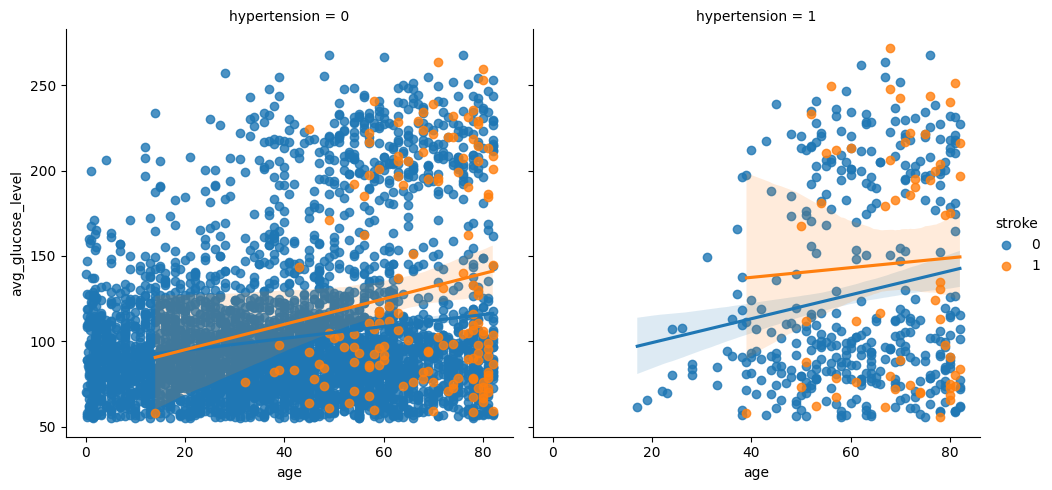

In [62]:
g = sns.lmplot(
    data=HeartStrokeDataFrame,
    y="avg_glucose_level", x="age", hue="stroke",col="hypertension",
    
)

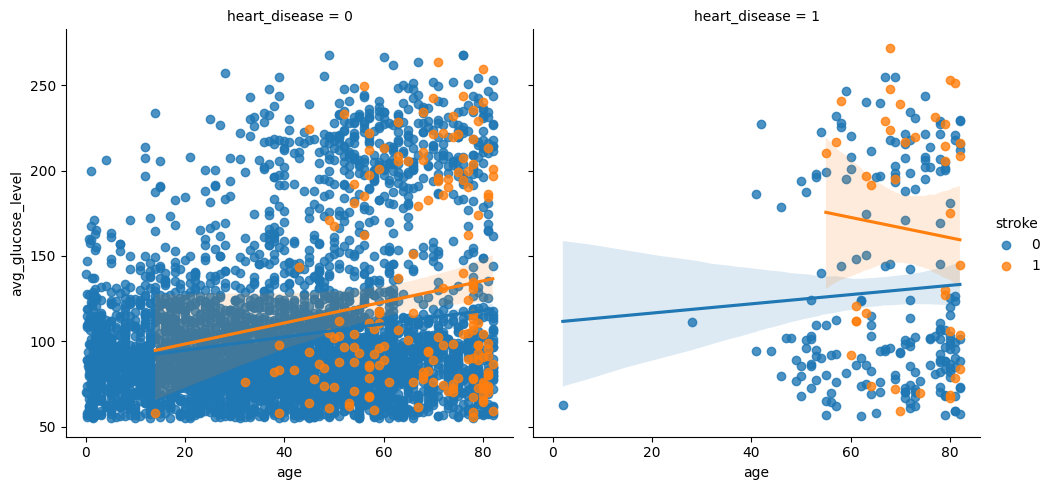

In [63]:
g = sns.lmplot(
    data=HeartStrokeDataFrame,
    y="avg_glucose_level", x="age", hue="stroke",col="heart_disease"
    
)
